In [518]:
import pandas as pd
import seaborn as sns
import numpy as np

df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [519]:
d1 = {'male':0,'female':1}
d2 = {'yes':1,'no':0}
d3 = {'southwest':0,'southeast':1,'northwest':2,'northeast':3}

df['sex'] = df['sex'].map(d1)
df['smoker'] = df['smoker'].map(d2)
df['region'] = df['region'].map(d3)

# Variable Selection

Carefully explain why the multiple regression model is constructed in the context of your own data and what is your choice of the dependent variable.
Select independent variables using various methods, including correlation matrix, VIF indicator and Cp Mallow’s technique. From many possible optimal models select the final one and explain your choice.


### Correlation Matrix

In [520]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

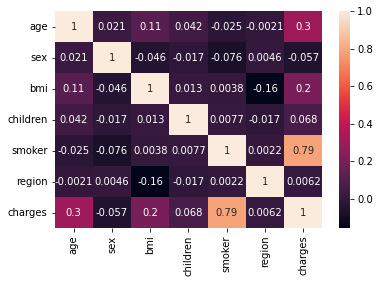

In [521]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

#looking at our heatmap we can conclude that age, bmi and smoker are the most important features
correlation_matrix_features = ['age','bmi','smoker']

### VIF Indicator

In [522]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)


    feature       VIF
0       age  7.832033
1       sex  1.918058
2       bmi  8.974743
3  children  1.799475
4    smoker  1.252796
5    region  2.534044


In [523]:
#removing age 
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[['sex', 'bmi', 'children', 'smoker', 'region']]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)


    feature       VIF
0       sex  1.897687
1       bmi  4.021313
2  children  1.783495
3    smoker  1.252612
4    region  2.472051


In [524]:
#removing bmi
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[['age', 'sex', 'children', 'smoker', 'region']]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)


    feature       VIF
0       age  3.509299
1       sex  1.838189
2  children  1.730943
3    smoker  1.224348
4    region  2.395542


In [525]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from statsmodels.formula.api import ols

def fit_multivar_regression(columns):

    y = df['charges']   
    X = df[columns]

    #splitting the data into training and testing data
    X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

    #creating the model
    model = linear_model.LinearRegression()
    model.fit(X_train,y_train)

    #predicting the values
    y_pred = model.predict(X_test)  
    
    #do the f statistic
    #do the t statistic
    #do the r2 score
    print('F statistic: ',model.score(X_test,y_test))
    print('R2 score: ',r2_score(y_test,y_pred))
    return model

fit_multivar_regression(correlation_matrix_features)
fit_multivar_regression(['age','bmi','smoker','children','region','sex'])
fit_multivar_regression(['age','smoker','children','sex','region'])
fit_multivar_regression(['bmi','smoker','children','sex','region'])

F statistic:  0.7924327534321977
R2 score:  0.7924327534321977
F statistic:  0.7962732059725786
R2 score:  0.7962732059725786
F statistic:  0.7704906224673702
R2 score:  0.7704906224673702
F statistic:  0.6997494064441712
R2 score:  0.6997494064441712


LinearRegression()

#### Getting the f values

In [526]:
model1 = ols("charges ~ age + bmi + smoker + children + region", data=df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     802.2
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        17:58:51   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1332   BIC:                         2.714e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.293e+04   1004.940    -12.864      0.0

In [527]:
model2 = ols("charges ~ age + smoker + children + region", data=df).fit()
print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     873.2
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        17:58:51   Log-Likelihood:                -13617.
No. Observations:                1338   AIC:                         2.724e+04
Df Residuals:                    1333   BIC:                         2.727e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2950.1138    593.462     -4.971      0.0

In [528]:
model3 = ols("charges ~ bmi + smoker + children + region", data=df).fit()
print(model3.summary())


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     655.1
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          9.25e-313
Time:                        17:58:51   Log-Likelihood:                -13750.
No. Observations:                1338   AIC:                         2.751e+04
Df Residuals:                    1333   BIC:                         2.754e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5028.2675   1088.739     -4.618      0.0

### CP Mallows

In [529]:
import numpy as np
import statsmodels.api as sm
import itertools


# Assuming 'data' is your DataFrame
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df['charges']

# Add a constant to the predictor matrix
X = sm.add_constant(X)

# Get the number of predictors
num_predictors = X.shape[1] - 1

# Generate all possible subsets of predictors
all_possible_subsets_of_predictors = []
for i in range(1, num_predictors + 1):
    subsets_i = itertools.combinations(X.columns[1:], i)
    all_possible_subsets_of_predictors.extend(subsets_i)

# Store Cp values for each model
cp_values = []

# Loop through different models
for predictor_subset in all_possible_subsets_of_predictors:
    # Fit the model with the subset of predictors
    X_subset = X[list(predictor_subset) + ['const']]
    model = sm.OLS(y, X_subset).fit()
    
    # Calculate Cp for this model
    residuals = model.resid
    df_model = len(predictor_subset) + 1  # Number of predictors + intercept
    df_residual = len(residuals) - df_model
    Cp = (1/len(df)) * (np.sum(residuals**2) + 2 * df_model * (model.mse_resid))
    
    # Append Cp value to cp_values
    cp_values.append(Cp)

# Find the model with the minimum Cp
best_model_index = np.argmin(cp_values)
best_model_subset = all_possible_subsets_of_predictors[best_model_index]

# Print the results
print(f"Best Subset of Predictors: {best_model_subset}")
print(f"Corresponding Cp Value: {cp_values[best_model_index]}")


Best Subset of Predictors: ('age', 'bmi', 'children', 'smoker', 'region')
Corresponding Cp Value: 36861035.4408294


# Sensitivity Analysis

In the model constructed in Part 1 perform sensitivity analysis. Use traditional methods like search for outliers in studentized residuals, check of homoskedasticity and verification of residuals independence. Apply also more advanced tools like DFFITS and DFBETAS. Consider eliminating some very outlying and/or influential observations and recalculation of your model. Explain whether removing some data improves the fit. Explain also why the data you have eliminated were outlying and/or influential.

Create a summary of your results and provide a final comment on the usefulness of your model.


In [530]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import patsy

In [531]:
model = ols("charges ~ age + smoker + children + region", data=df).fit()
#model_prediction = model.get_prediction(df[['age', 'bmi', 'smoker', 'children', 'region']])
#y_pred = model.predict(df[['age', 'bmi', 'smoker', 'children', 'region']])
'''
model_expr = 'charges ~ age + bmi + smoker + children + region'
y, X = patsy.dmatrices(model_expr, data=df, return_type='dataframe')

mask = np.random.rand(len(X)) < 0.8
X_train = X[mask]
y_train = y[mask]
X_test = X[~mask]
y_test = y[~mask]
'''

"\nmodel_expr = 'charges ~ age + bmi + smoker + children + region'\ny, X = patsy.dmatrices(model_expr, data=df, return_type='dataframe')\n\nmask = np.random.rand(len(X)) < 0.8\nX_train = X[mask]\ny_train = y[mask]\nX_test = X[~mask]\ny_test = y[~mask]\n"

In [532]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     873.2
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        17:58:52   Log-Likelihood:                -13617.
No. Observations:                1338   AIC:                         2.724e+04
Df Residuals:                    1333   BIC:                         2.727e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2950.1138    593.462     -4.971      0.0

In [533]:
#model = sm.OLS(y_train, X_train)
#results = model.fit()
#print(results.summary())

### Outliers in student residuals

In [534]:
#calculate studentized residuals
stud_res = model.outlier_test()

#display studentized residuals
print(stud_res)

      student_resid   unadj_p  bonf(p)
0         -1.448400  0.147741      1.0
1         -0.124530  0.900914      1.0
2         -0.278907  0.780360      1.0
3          2.484568  0.013093      1.0
4         -0.322213  0.747342      1.0
...             ...       ...      ...
1333      -0.266672  0.789763      1.0
1334       0.007013  0.994406      1.0
1335      -0.062997  0.949778      1.0
1336      -0.122099  0.902839      1.0
1337      -1.344545  0.179001      1.0

[1338 rows x 3 columns]


Text(0, 0.5, 'Studentized Residuals')

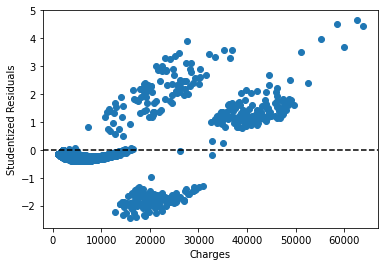

In [535]:
x = df['charges']
y = stud_res['student_resid']


plt.scatter(x, y)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Charges')
plt.ylabel('Studentized Residuals')


In [536]:
#remove all points with studentized residuals greater than 3
#df = df.drop(np.where(stud_res.iloc[:,0] > 3)[0])

#fit_multivar_regression(['age','bmi','smoker'])
model4 = ols("charges ~ age + smoker + children + region", data=df).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     873.2
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        17:58:54   Log-Likelihood:                -13617.
No. Observations:                1338   AIC:                         2.724e+04
Df Residuals:                    1333   BIC:                         2.727e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2950.1138    593.462     -4.971      0.0

### Homoskedacity

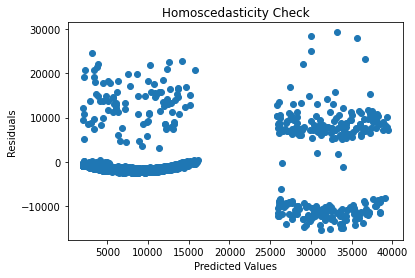

In [537]:
#test homoskedacity
residuals = model.resid
y_pred = model.predict(df[['age', 'smoker', 'children', 'region']])
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Homoscedasticity Check")
plt.show()



In [538]:
y_pred

0       26080.902201
1        2518.502915
2        6224.742532
3        6192.550481
4        5919.454697
            ...     
1333    12298.101475
1334     2161.365411
1335     2030.862028
1336     2784.897688
1337    37681.428519
Length: 1338, dtype: float64

### Residuals Independence

### DFFITS

In [539]:
infl = model.get_influence()
sm_fr = infl.summary_frame()
dffits = model.get_influence().dffits[0]
dffits

array([-0.12201565, -0.0066212 , -0.01658164, ..., -0.00365568,
       -0.00787512, -0.10837134])

### DFBETAS

In [540]:
dfbetas = model.get_influence().dfbetas
dfbetas

array([[-7.51230299e-02,  5.37870274e-02, -7.73199629e-02,
         3.52732973e-02,  5.42635269e-02],
       [-6.14471069e-03,  5.18865213e-03,  1.85566179e-03,
         5.85062730e-05,  1.50270317e-03],
       [-6.32509662e-03,  6.72096703e-03,  4.13087757e-03,
        -1.23276058e-02,  3.14973494e-03],
       ...,
       [-3.44937255e-03,  2.56440367e-03,  9.26401410e-04,
         1.46273855e-03,  7.84052329e-04],
       [-7.31723926e-03,  4.26099927e-03,  1.77120587e-03,
         2.91668592e-03,  4.54819768e-03],
       [ 4.68258654e-02, -6.05893320e-02, -7.44033174e-02,
         3.63402738e-02, -1.65799721e-02]])

In [541]:
# Identify influentialobservations based on DFFITS
influential_dffits = np.where(np.abs(dffits) > 2 * np.sqrt(len(x) * model.df_model / model.df_resid))

# Identify influential observations based on DFBETAS for a specific coefficient
coefficient_index = 0  # Index of the coefficient to analyze
influential_dfbetas = np.where(np.abs(dfbetas[:, coefficient_index]) > 2 / np.sqrt(len(x)))

In [542]:
len(influential_dfbetas[0])

79

In [543]:
#delete influential points from df
df = df.drop(influential_dfbetas[0])
model5 = ols("charges ~ age + smoker + children + region", data=df).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     1018.
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        17:58:58   Log-Likelihood:                -12631.
No. Observations:                1259   AIC:                         2.527e+04
Df Residuals:                    1254   BIC:                         2.530e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4261.1208    552.813     -7.708      0.0

In [544]:
X = df['charges']
y = df[['age','bmi','smoker']]

X_clean = np.delete(X, influential_dfbetas, axis=0)
y_clean = np.delete(y, influential_dfbetas, axis=0)

# Fit the model with the subset of predictors
model_clean = sm.OLS(y_clean, sm.add_constant(X_clean)).fit()




IndexError: index 1288 is out of bounds for axis 0 with size 1259

In [ ]:
#get statistics from the model
print(model_clean.summary())

ValueError: shapes (1259,3) and (1259,3) not aligned: 3 (dim 1) != 1259 (dim 0)